## Arbol de decisiones clásico

### **¿Qué es un Árbol de Decisión?**

Un árbol de decisión es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como de regresión. El árbol representa una serie de decisiones, donde:

* Nodos internos: Representan las características o atributos del dataset y las condiciones para realizar una decisión.
* Ramas: Indican el resultado de cada decisión tomada.
* Hojas: Representan las clases finales (en clasificación) o valores (en regresión).

### **¿Qué es el Índice Gini?**

El índice Gini es una medida de impureza utilizada para evaluar qué tan bien una característica separa las clases en un nodo del árbol:

* Si el índice Gini es 0, significa que el nodo es puro (todas las muestras pertenecen a una sola clase).
* Si el índice Gini es 1, significa que el nodo está completamente mezclado (las muestras están distribuidas uniformemente entre las clases).
* El árbol de decisión selecciona la característica y el punto de corte que minimizan el índice Gini, con el objetivo de crear nodos lo más puros posible.

¿cómo se cálcula? 

* Gini = 1 - sumatoria de las proporciones de las clases al cuadrado

**Diferencia entre Gini y Entropía**
Ambas son métricas para medir la impureza, pero Gini es más rápido de calcular y es el criterio por defecto en scikit-learn. La entropía suele ser más informativa en datasets desbalanceados, aunque el tiempo de cómputo es mayor.

In [16]:
# Calculo de un nodo, paso a paso

# Paso 1: calculo de las proporciones
setosa = 0
versicolor = 36
viginica = 1
proporcion_setosa = setosa / (setosa + versicolor + viginica)
proporcion_versicolor = versicolor / (setosa + versicolor + viginica)
proporcion_viginica = viginica / (setosa + versicolor + viginica)
print(proporcion_setosa)
print(proporcion_versicolor)
print(proporcion_viginica)

# Paso 2: calculo del gini 
gini = 1 - (proporcion_setosa ** 2 + proporcion_versicolor ** 2 + proporcion_viginica ** 2)
print(f'el indice de gini es {gini}') 

0.0
0.972972972972973
0.02702702702702703
el indice de gini es 0.0525931336742147


### Ejemplo usando el dataset Iris:

El dataset Iris tiene 4 características: sepal length, sepal width, petal length, y petal width. Un árbol de decisión entrenado con este dataset podría realizar las siguientes preguntas para clasificar una flor:

**¿El largo del pétalo es menor a 2.5 cm?**
Sí: Puede ser una flor de la clase Setosa.
No: Continuar evaluando con otra característica.

**¿El ancho del pétalo es menor a 1.8 cm?**
Sí: Puede ser una flor de la clase Versicolor.
No: Puede ser una flor de la clase Virginica.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Cargar el dataset Iris
iris = load_iris()
print(list(iris.target_names))
print(list(iris.feature_names)) # ['longitud del sépalo (cm)', 'ancho del sépalo (cm)', 'longitud del pétalo (cm)', 'ancho del pétalo (cm)']

['setosa', 'versicolor', 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


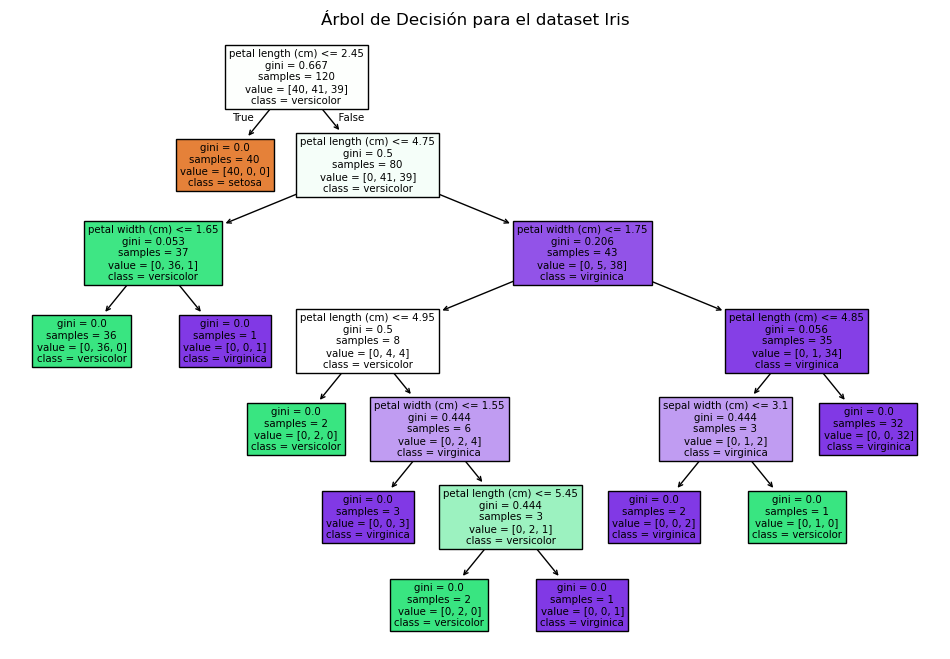

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para el dataset Iris")
plt.show()

#### Ejercicio en clase:

Usando el ejempplo que se muestra a continuación escoja un nodo y haga el cálculo a mano pero para la Entropia (igual como lo hizo el profesor con el Gini)

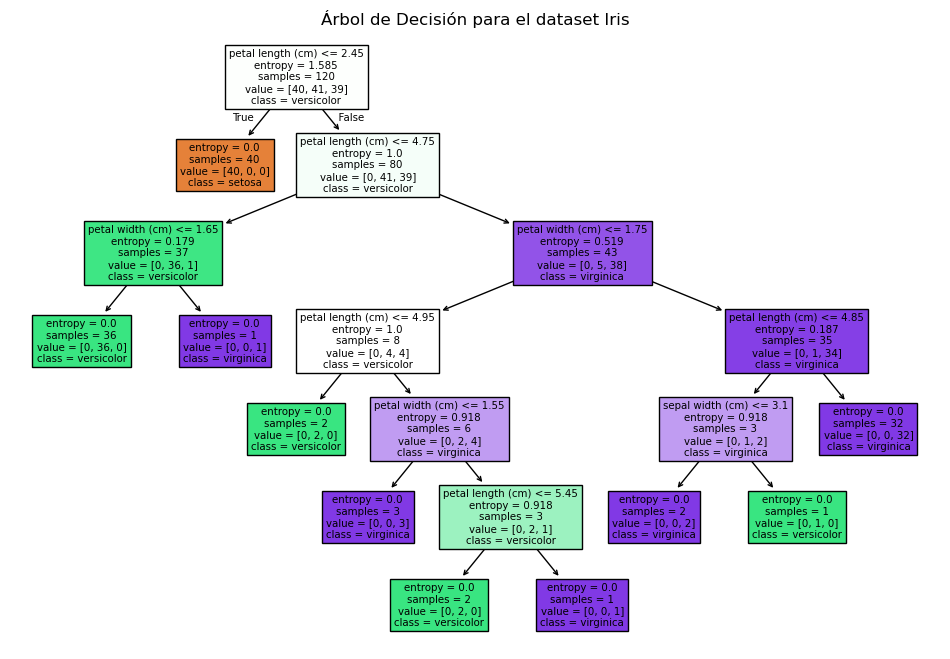

In [13]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42,criterion='entropy')
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para el dataset Iris")
plt.show()

In [17]:
# Cálculo del Gini a mano

Explicación:

* Cálculo Detallado: El código evalúa todas las posibles divisiones para cada característica y guarda los resultados en un DataFrame.
* Selección del Mejor Corte: Utiliza idxmin() para encontrar la fila con el índice Gini más bajo, que representa el mejor punto de corte inicial.
* Resultado: Muestra el mejor corte inicial encontrado, indicando la característica, el valor de corte, el índice Gini y los tamaños de los grupos resultantes.

¿Qué Mostrará el Código?

El código mostrará:

* La tabla completa con los cálculos detallados para cada posible punto de corte.
* El mejor corte inicial, con información sobre qué característica utilizar, el valor de corte y el índice Gini correspondiente.


Para interpretar la tabla de resultados y determinar el primer corte (el mejor punto de división inicial) del árbol de decisión utilizando el índice Gini, sigue estos pasos:

Paso a Paso:

1. Seleccionar la Característica (Feature):
Observa la columna Feature para ver todas las características del dataset que se evaluaron (sepal length, sepal width, petal length, petal width).

2. Identificar los Posibles Puntos de Corte (Split Value):
La columna Split Value muestra los diferentes valores donde se evaluó dividir los datos para cada característica.

3. Evaluar el Índice Gini (Gini Index):
La columna Gini Index muestra el índice Gini calculado para cada punto de corte. El objetivo es encontrar el valor de índice Gini más bajo, ya que indica una mejor separación de las clases.

4. Determinar el Mejor Corte:
Filtra la tabla para cada característica y selecciona la fila con el índice Gini más bajo. Esa fila te indicará el mejor punto de corte para esa característica.

Compara los valores mínimos de índice Gini entre todas las características para determinar cuál ofrece la mejor división inicial del árbol.

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Función para calcular el índice Gini
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p ** 2
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Crear lista para almacenar los resultados
detailed_results = []

# Iterar sobre cada característica
for feature in X.columns:
    # Ordenar los datos por la característica actual
    data = pd.concat([X[feature], y], axis=1).sort_values(by=feature).values
    classes = np.unique(y)

    # Probar cada posible punto de división
    for i in range(1, len(data)):
        left_group = data[:i]
        right_group = data[i:]
        gini = gini_index([left_group, right_group], classes)
        split_value = data[i, 0]

        # Guardar los resultados de cada iteración
        detailed_results.append({
            'Feature': feature,
            'Split Value': split_value,
            'Gini Index': gini,
            'Left Group Size': len(left_group),
            'Right Group Size': len(right_group)
        })

# Crear DataFrame con los resultados detallados
df_detailed_results = pd.DataFrame(detailed_results)

# Encontrar el mejor punto de corte inicial (índice Gini más bajo)
best_split = df_detailed_results.loc[df_detailed_results['Gini Index'].idxmin()]

# Mostrar los resultados detallados
print("Tabla de Cálculos Detallados del Índice Gini:")
print("\nEl mejor punto de corte inicial es:")
print(best_split)
df_detailed_results.head()


Tabla de Cálculos Detallados del Índice Gini:

El mejor punto de corte inicial es:
Feature             petal length (cm)
Split Value                       3.0
Gini Index                   0.333333
Left Group Size                    50
Right Group Size                  100
Name: 347, dtype: object


,Feature,Split Value,Gini Index,Left Group Size,Right Group Size
0,sepal length (cm),4.4,0.662192,1,149
1,sepal length (cm),4.4,0.657658,2,148
2,sepal length (cm),4.4,0.653061,3,147
3,sepal length (cm),4.5,0.648402,4,146
4,sepal length (cm),4.6,0.643678,5,145
